In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [2]:
images=['cloudy','desert','green_area','water']
feature=[]
target=[]

In [5]:
datadir=r'C:\Users\22anj\Desktop\images\dataset'

In [6]:
for i in (images):
    count=0
    print(f'loading..images:{i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        if count<200:
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(150,150,3))
            feature.append(img_resized.flatten())
            target.append(images.index(i))
            
            count+=1
    print(f'loading..images:{i} successful')
    
feature=np.array(feature)
target=np.array(target)
    

loading..images:cloudy
loading..images:cloudy successful
loading..images:desert
loading..images:desert successful
loading..images:green_area
loading..images:green_area successful
loading..images:water
loading..images:water successful


In [7]:
df=pd.DataFrame(feature)
df['target']=target
df.shape

(800, 67501)

In [8]:
x=df.drop('target',axis=1)

In [9]:
y=df['target']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.svm import SVC

In [14]:
S=SVC()

In [15]:
S.fit(x_train,y_train)

SVC()

In [16]:
y_pred=S.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [18]:
import seaborn as sns

Text(0.5, 1.0, 'confusion_matrix SVC')

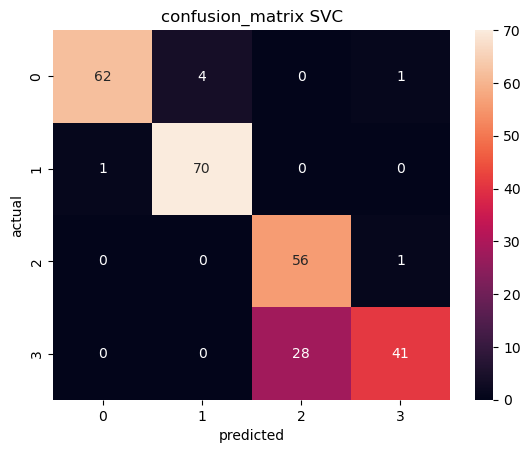

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion_matrix SVC')

In [21]:
accuracy_score(y_test,y_pred)

0.8674242424242424

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
K=KNeighborsClassifier()

In [31]:
K.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
from sklearn.metrics import pairwise_distances_argmin

In [35]:
y_p=K.predict(x_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'